In [16]:
import datetime
import pandas as pd
from winsound import Beep
import shioaji as sj
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import yfinance as yf
import numpy as np

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

In [4]:
#讀取兩個dataframe
df_NQTXF = pd.read_parquet('datas/混合NQTXF.pqt', engine='fastparquet')

df_NQTXF

,Close_TXF,Close_NQ
Datetime,,
2023-08-15 15:00:00,16424.0,15215.879
2023-08-15 15:01:00,16427.0,15215.339
2023-08-15 15:02:00,16429.0,15220.259
2023-08-15 15:03:00,16425.0,15215.889
2023-08-15 15:04:00,16434.0,15223.509


Duplicate key in file WindowsPath('d:/source/Anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  Microsoft JhengHei')


<AxesSubplot:xlabel='Datetime'>

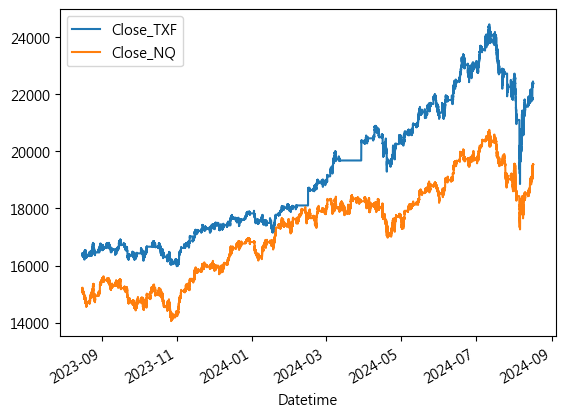

In [5]:
# df_NQ_close.index = df_NQ_close.index.strftime("%Y-%m-%d %H:%M:%S")
df_NQTXF.plot.line()

In [8]:
# 提取Close_TXF和Close_NQ列
x1 = df_NQTXF['Close_TXF']
x2 = df_NQTXF['Close_NQ']

# 進行共整合檢驗
coint_t, p_value, Critical_values = coint(x1, x2)

print(f'共整合檢驗的t統計量: {coint_t}')
print(f'共整合檢驗的p值: {p_value}')
print(f'Critical values: {Critical_values}')
#共整合檢驗的t統計量: -2.44253944384822
# 共整合檢驗的p值: 0.3049810129878001
# Critical values: [-3.89646082 -3.33614161 -3.04445806]

# 計算皮爾森相關係數
correlation = x1.corr(x2)
print(f'皮爾森相關係數: {correlation}')
# 皮爾森相關係數: 0.9503581100538628

共整合檢驗的t統計量: -2.44253944384822
共整合檢驗的p值: 0.3049810129878001


In [17]:
#如果只看夜盤部分?

# Select rows between 3:00 PM and 5:00 AM
filtered_df = df_NQTXF.between_time('15:00', '05:00')
# print(filtered_df)

# Function to apply cointegration test
def calculate_coint(group):
    x1_night = group['Close_TXF']
    x2_night = group['Close_NQ']
    coint_t, p_value, _ = coint(x1_night, x2_night)
    return pd.Series({'coint_t': coint_t, 'p_value': p_value})

# Group by date and apply the function
results = filtered_df.groupby(filtered_df.index.date).apply(calculate_coint)

# Print the results
print(results)


d:\source\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\source\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
d:\source\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\source\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
d:\source\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\source\Anaconda\lib\site-packages\statsmodels\tsa\statt

             coint_t   p_value
2023-08-15 -3.062817  0.096018
2023-08-16 -1.446253  0.781220
2023-08-17 -1.689620  0.681629
2023-08-18 -1.868684  0.595801
2023-08-19 -3.258628  0.060658
...              ...       ...
2024-08-12 -3.441133  0.037983
2024-08-13 -1.499526  0.761374
2024-08-14 -0.061986  0.984352
2024-08-15 -1.273474  0.837597
2024-08-16 -2.072714  0.490635

[368 rows x 2 columns]


<AxesSubplot:xlabel='Datetime'>

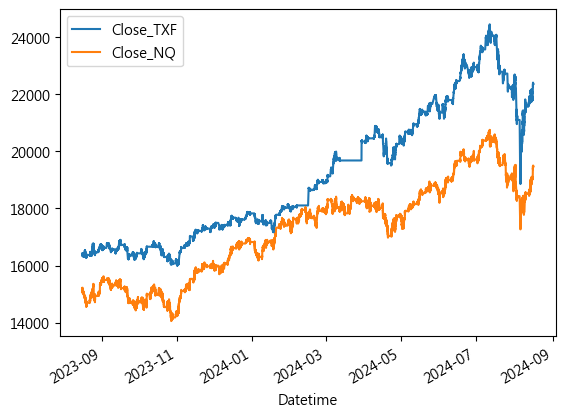

In [23]:
filtered_df.plot.line()

In [20]:
results.to_excel("datas/混合NQTXF結果.xlsx")

In [22]:
# Drop rows where any cell value is 0
df_cleaned = results[(results != 0).all(axis=1)]

# Calculate the average of the coint_t column
average_coint_t = df_cleaned['coint_t'].mean()
print(f'Average of coint_t column: {average_coint_t}')

average_p_value = df_cleaned['p_value'].mean()
print(f'Average of p_value column: {average_p_value}')

Average of coint_t column: -2.0801405474905432
Average of p_value column: 0.5056584185119729
